In [1]:
#Shubham Tribedi | 1811100002037

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.encoding import OrdinalEncoder

In [3]:
#load dataset

data = pd.read_csv(
    'houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [4]:
# let's have a look at how many labels each variable has
for x in data.columns:
    #prinfting unique values
    print(x ,':', len(data[x].unique()),' labels')

Neighborhood : 25  labels
Exterior1st : 15  labels
Exterior2nd : 16  labels
SalePrice : 663  labels


In [5]:
train,test=train_test_split(data[["Neighborhood","Exterior1st","Exterior2nd","SalePrice"]],test_size=0.3,random_state=0)
print(train.shape,test.shape)

(1022, 4) (438, 4)


In [6]:
mean_SalePrice = train['SalePrice'].mean()

<AxesSubplot:xlabel='Exterior2nd', ylabel='mean_SalePrice'>

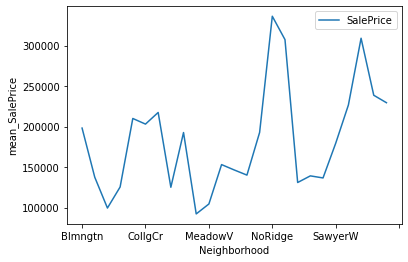

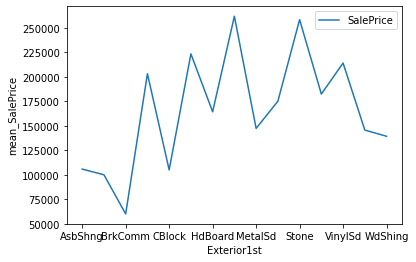

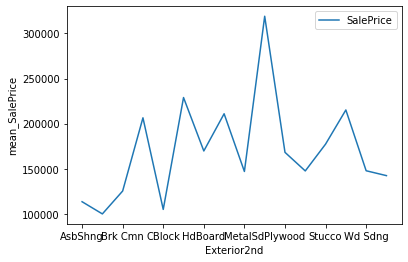

In [7]:
# let's explore the relationship of the categories with the target
train.groupby(by=['Neighborhood']).mean().plot(ylabel='mean_SalePrice')
train.groupby(by=['Exterior1st']).mean().plot(ylabel='mean_SalePrice')
train.groupby(by=['Exterior2nd']).mean().plot(ylabel='mean_SalePrice')

In [8]:
# let's order the labels according to the mean target value
mean_encode=train.groupby('Neighborhood')["SalePrice"].mean().sort_values()
print(mean_encode)

Neighborhood
IDOTRR      92174.166667
BrDale      99440.000000
MeadowV    104441.666667
Edwards    125082.676056
BrkSide    125438.414634
OldTown    130958.328767
Sawyer     136596.442623
Blueste    137500.000000
SWISU      139154.666667
NPkVill    140107.142857
NAmes      146435.264901
Mitchel    153070.444444
SawyerW    179463.088889
Gilbert    192662.290909
NWAmes     192788.235294
Blmngtn    198164.500000
CollgCr    203086.371429
ClearCr    210034.666667
Crawfor    217453.914286
Somerst    226644.196429
Veenker    229500.000000
Timber     238700.100000
NridgHt    307418.137255
StoneBr    309105.937500
NoRidge    336264.666667
Name: SalePrice, dtype: float64


In [9]:
# first  we generate an ordered list with the labels
mean_encode.index

Index(['IDOTRR', 'BrDale', 'MeadowV', 'Edwards', 'BrkSide', 'OldTown',
       'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor',
       'Somerst', 'Veenker', 'Timber', 'NridgHt', 'StoneBr', 'NoRidge'],
      dtype='object', name='Neighborhood')

In [10]:
# next let's create a dictionary with the mappings of categories to numbers
ordinal_mapping={}
index=0
for i in train.groupby('Neighborhood').mean().sort_values('SalePrice').index:
    ordinal_mapping[i]=index
    index+=1
ordinal_mapping

{'IDOTRR': 0,
 'BrDale': 1,
 'MeadowV': 2,
 'Edwards': 3,
 'BrkSide': 4,
 'OldTown': 5,
 'Sawyer': 6,
 'Blueste': 7,
 'SWISU': 8,
 'NPkVill': 9,
 'NAmes': 10,
 'Mitchel': 11,
 'SawyerW': 12,
 'Gilbert': 13,
 'NWAmes': 14,
 'Blmngtn': 15,
 'CollgCr': 16,
 'ClearCr': 17,
 'Crawfor': 18,
 'Somerst': 19,
 'Veenker': 20,
 'Timber': 21,
 'NridgHt': 22,
 'StoneBr': 23,
 'NoRidge': 24}

In [11]:
train['Neighborhood']=train['Neighborhood'].replace(ordinal_mapping)

In [12]:
train['Neighborhood'].head(10)

64      16
682     17
960      4
1384     3
1100     8
416      6
1034    18
853     10
472      3
1011     3
Name: Neighborhood, dtype: int64

In [13]:
# and now we run a loop over the remaining categorical variables
ordinal_mapping_2={}
index=0
for i in train.groupby('Exterior1st').mean().sort_values('SalePrice').index:
    ordinal_mapping_2[i]=index
    index+=1
ordinal_mapping_3={}
index=0
for i in train.groupby('Exterior2nd').mean().sort_values('SalePrice').index:
    ordinal_mapping_3[i]=index
    index+=1
train['Exterior1st']=train['Exterior1st'].replace(ordinal_mapping_2)
train['Exterior2nd']=train['Exterior2nd'].replace(ordinal_mapping_3)



In [14]:
train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
64,16,11,13,219500
682,17,5,7,173000
960,4,5,8,116500
1384,3,4,4,105000
1100,8,5,7,60000


<AxesSubplot:xlabel='Exterior2nd', ylabel='mean_SalePrice'>

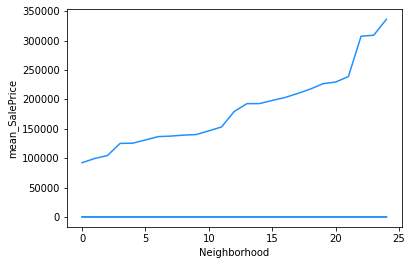

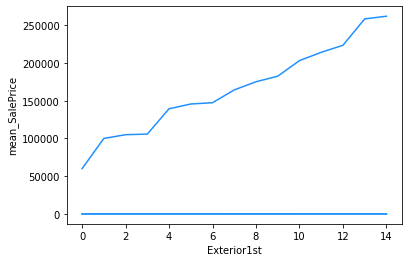

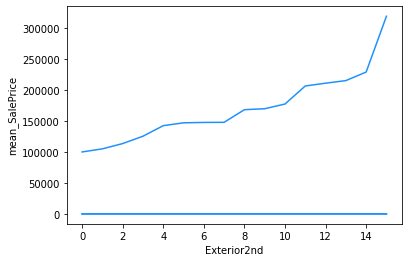

In [15]:
# let's inspect the newly created monotonic relationship
# between the variables and the target
train.groupby(by=['Neighborhood']).mean().plot(ylabel='mean_SalePrice', legend = False, color='dodgerblue')
train.groupby(by=['Exterior1st']).mean().plot(ylabel='mean_SalePrice', legend = False, color='dodgerblue')
train.groupby(by=['Exterior2nd']).mean().plot(ylabel='mean_SalePrice', legend = False, color='dodgerblue')